## Install and import

In [1]:
# install
!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [2]:
# import 1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [3]:
# import 2
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import torchvision.transforms as transforms
from PIL import ImageOps
from PIL import Image

Mounted at /content/drive


# Determine Model(Nural Network) and Set Learned Model

In [5]:
# set parameters of Linner
n_input = 784

n_output = 10

n_hidden = 128

print(n_input, n_output)

784 10


In [6]:
# define Model
class Net(nn.Module):
  def __init__(self, n_input, n_output, n_hidden):
    super().__init__()

    self.l1 = nn.Linear(n_input, n_hidden)
    self.l2 = nn.Linear(n_hidden, n_hidden)
    self.l3 = nn.Linear(n_hidden, n_output)
    self.relu = nn.ReLU(inplace=True)

  def forward(self, x):
    x1 = self.l1(x)
    x2 = self.relu(x1)
    x3 = self.l2(x2)
    x4 = self.relu(x3)
    x5 = self.l3(x4)
    return x5

In [7]:
learned_model_path = '/content/drive/My Drive/Colab Notebooks/Number_Descrimination/net_weights.pth'
learned_model = torch.load(learned_model_path)

In [8]:
net_inf = Net(n_input, n_output, n_hidden)
net_inf.load_state_dict(learned_model)
net_inf.eval()

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)

# Read the data and predict

Q pathを入れるだけで入手できる関数にしたい

In [9]:
# def read_data(path):
#   im_path = '/content/drive/My Drive/Colab Notebooks/Number_Descrimination/path'
#   input_im = cv2.imread(im_path)
#   return input_im

In [10]:
# read image data
def read_data(path):
  input_im = cv2.imread(path)
  return input_im

In [11]:
transform_net = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5,0.5),
    transforms.Resize((28,28)),
    transforms.Lambda(lambda x: x.view(-1))
])

In [56]:
# to shape whitch can use net_inf
def transform_im_net(input_im):
  # to gray_scale
  gray_im = cv2.cvtColor(input_im, cv2.COLOR_RGB2GRAY)

  # if the data is reverse, invert(1.0000 to -1.0000)
  if (gray_im >= 170).sum().item() >= 100:
    # subtle number to 255
    for i in range(gray_im.shape[0]):
      for j in range(gray_im.shape[1]):
        if gray_im[i][j] >= 160:
          gray_im[i][j] = 255
        else:
          gray_im[i][j] = 0

    # invert(1.0000 to -1.0000)
    gray_im = Image.fromarray(gray_im)
    gray_im = ImageOps.invert(gray_im)

  else:
    gray_im = gray_im

  # transform to tensor
  input_i = transform_net(gray_im)

  print(gray_im)
  print(input_i)

  plt.imshow(gray_im)
  plt.show()

  return gray_im, input_i

In [13]:
# predict
def predict(input_i):
  output_i = net_inf(input_i)
  output_i_matrix = output_i.unsqueeze(0)
  pred_label = torch.max(output_i_matrix, 1)[1]

  print(output_i)
  print(pred_label)

  return output_i, pred_label

In [14]:
def show_image(input_im, label):
  ax = plt.subplot(1,1,1)
  ax.set_title(label)
  plt.imshow(input_im)
  plt.show()

In [57]:
def predict_onece(path):
  input_im = read_data(path)
  gray_im, input_i = transform_im_net(input_im)
  output_i, pred_label = predict(input_i)
  show_image(input_im, pred_label)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
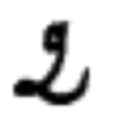

In [16]:
input_im_01 = read_data('/content/drive/My Drive/Colab Notebooks/Number_Descrimination/input_im_01.png')
input_im_01

<PIL.Image.Image image mode=L size=114x126 at 0x7C5B2BEA18A0>
tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.00

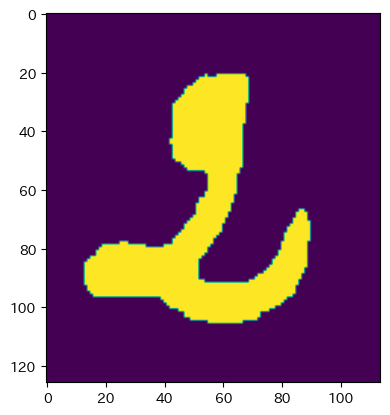

In [52]:
gray_im_01, input_i_01 = transform_im_net(input_im_01)

In [53]:
output_01, pred_label_01 = predict(input_i_01)

tensor([ -2.3304,   5.3688,   7.4646,   3.7210, -10.9776,   5.0522,  -0.0150,
         -5.5741,   3.3843,  -8.4656], grad_fn=<ViewBackward0>)
tensor([2])


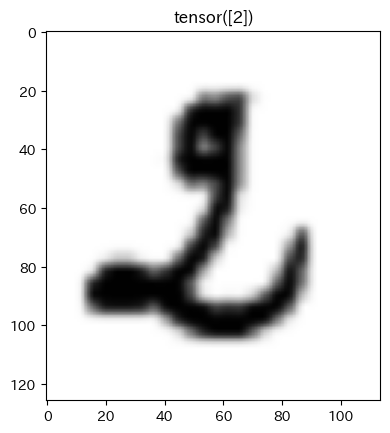

In [54]:
show_image(input_im_01, pred_label_01)

<PIL.Image.Image image mode=L size=1015x1289 at 0x7C5B2BC3D8A0>
tensor([-1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -9.9964e-01, -9.8660e-01,
        -9.7603e-01, -9.9696e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -9.9824e-01, -9.2097e-01,
        -6.2836e-01, -2.2581e-01,  4.7426e-02,  6.4627e-02, -3.5501e-01,
        -9.4358e-01, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
        -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, 

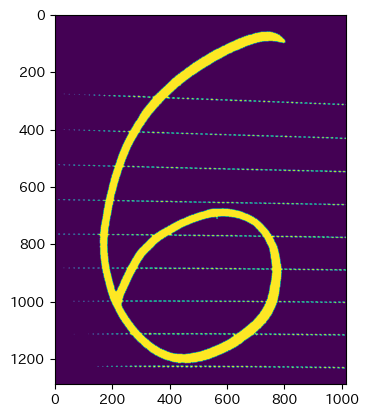

tensor([-2.4706,  0.5432,  2.2631,  3.3221, -2.6182,  2.3404, -1.3413, -2.1935,
         0.1795, -1.7077], grad_fn=<ViewBackward0>)
tensor([3])


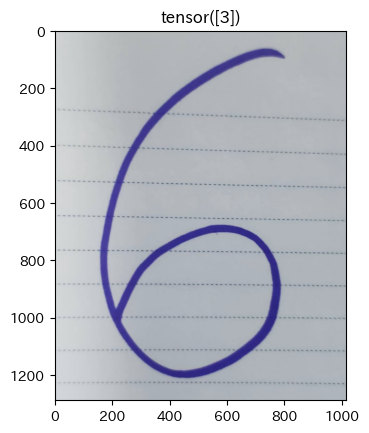

In [58]:
predict_onece('/content/drive/My Drive/Colab Notebooks/Number_Descrimination/input_im_02.jpg')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
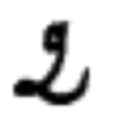

In [34]:
input_im_01 = read_data('/content/drive/My Drive/Colab Notebooks/Number_Descrimination/input_im_01.png')
input_im_01